#### Data

- id : 샘플 아이디
- Age : 나이
- TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
- CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
- DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
- Occupation : 직업
- Gender : 성별
- NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
- NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
- ProductPitched : 영업 사원이 제시한 상품
- PreferredPropertyStar : 선호 호텔 숙박업소 등급
- MaritalStatus : 결혼여부
- NumberOfTrips : 평균 연간 여행 횟수
- Passport : 여권 보유 여부 (0: 없음, 1: 있음)
- PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
- OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
- NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
- Designation : (직업의) 직급
- MonthlyIncome : 월 급여
- ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\82109\OneDrive\바탕 화면\train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [3]:
test = pd.read_csv(r"C:\Users\82109\OneDrive\바탕 화면\test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2933 non-null   int64  
 1   Age                       2801 non-null   float64
 2   TypeofContact             2918 non-null   object 
 3   CityTier                  2933 non-null   int64  
 4   DurationOfPitch           2784 non-null   float64
 5   Occupation                2933 non-null   object 
 6   Gender                    2933 non-null   object 
 7   NumberOfPersonVisiting    2933 non-null   int64  
 8   NumberOfFollowups         2901 non-null   float64
 9   ProductPitched            2933 non-null   object 
 10  PreferredPropertyStar     2917 non-null   float64
 11  MaritalStatus             2933 non-null   object 
 12  NumberOfTrips             2850 non-null   float64
 13  Passport                  2933 non-null   int64  
 14  PitchSat

In [4]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [5]:
train.corr()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
id,1.000000,0.006332,-0.022072,0.002178,0.036337,-0.010110,-0.011251,0.041546,0.009294,-0.040459,-0.013982,0.028112,0.032920,-0.048933
Age,0.006332,1.000000,0.007875,0.025779,0.010795,0.009834,-0.026789,0.178143,0.030162,0.032860,0.060298,0.039495,0.440733,-0.135832
CityTier,-0.022072,0.007875,1.000000,0.056010,0.018071,0.023532,-0.011882,-0.020887,0.013665,-0.028168,0.014177,0.025359,0.057705,0.085583
DurationOfPitch,0.002178,0.025779,0.056010,1.000000,0.096268,0.039485,-0.004448,0.022236,0.043478,0.011926,-0.015087,0.047770,0.016011,0.072899
NumberOfPersonVisiting,0.036337,0.010795,0.018071,0.096268,1.000000,0.333738,0.017057,0.214895,0.023638,-0.012981,0.018545,0.610193,0.168701,0.006483
NumberOfFollowups,-0.010110,0.009834,0.023532,0.039485,0.333738,1.000000,-0.049151,0.135183,-0.005332,-0.007195,0.051920,0.293942,0.194668,0.105038
PreferredPropertyStar,-0.011251,-0.026789,-0.011882,-0.004448,0.017057,-0.049151,1.000000,0.035064,0.014701,-0.019620,0.031355,0.027038,-0.024338,0.114923
NumberOfTrips,0.041546,0.178143,-0.020887,0.022236,0.214895,0.135183,0.035064,1.000000,0.004418,0.034816,0.005982,0.189517,0.137093,0.044922
Passport,0.009294,0.030162,0.013665,0.043478,0.023638,-0.005332,0.014701,0.004418,1.000000,0.018526,-0.045133,0.030512,0.017044,0.293726
PitchSatisfactionScore,-0.040459,0.032860,-0.028168,0.011926,-0.012981,-0.007195,-0.019620,0.034816,0.018526,1.000000,0.073097,0.023842,-0.005497,0.067736


- 전반적으로 매우 상관계수가 낮음

### 결측치 처리

In [6]:
train.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [7]:
test.isna().sum()

id                            0
Age                         132
TypeofContact                15
CityTier                      0
DurationOfPitch             149
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               133
dtype: int64

In [8]:
train = train.replace('Fe Male', 'Female')
train['Gender'].value_counts()

Male      1207
Female     748
Name: Gender, dtype: int64

In [9]:
test = test.replace('Fe Male', 'Female')
test['Gender'].value_counts()

Male      1709
Female    1224
Name: Gender, dtype: int64

#### Age : 직업에 따른 직급의 나이 평균으로 채움

In [10]:
train['Age'].describe()

count    1861.000000
mean       37.462117
std         9.189948
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

In [11]:
train.groupby(['Occupation','Designation']).mean()['Age']

Occupation      Designation   
Free Lancer     Executive         37.000000
Large Business  AVP               49.000000
                Executive         30.765625
                Manager           37.215686
                Senior Manager    44.031250
                VP                45.200000
Salaried        AVP               45.983871
                Executive         33.502747
                Manager           37.750842
                Senior Manager    40.425532
                VP                48.019231
Small Business  AVP               50.262295
                Executive         32.155894
                Manager           36.730897
                Senior Manager    41.429688
                VP                46.812500
Name: Age, dtype: float64

In [12]:
test.groupby(['Occupation','Designation']).mean()['Age']

Occupation      Designation   
Free Lancer     Executive         38.000000
Large Business  AVP               47.818182
                Executive         32.070175
                Manager           37.746479
                Senior Manager    40.865385
                VP                48.000000
Salaried        AVP               47.517857
                Executive         33.770459
                Manager           37.197425
                Senior Manager    39.700508
                VP                48.548387
Small Business  AVP               48.505618
                Executive         32.961538
                Manager           37.716129
                Senior Manager    40.382199
                VP                48.444444
Name: Age, dtype: float64

In [13]:
round(train.groupby(['Occupation','Designation']).mean()['Age'],0)

Occupation      Designation   
Free Lancer     Executive         37.0
Large Business  AVP               49.0
                Executive         31.0
                Manager           37.0
                Senior Manager    44.0
                VP                45.0
Salaried        AVP               46.0
                Executive         34.0
                Manager           38.0
                Senior Manager    40.0
                VP                48.0
Small Business  AVP               50.0
                Executive         32.0
                Manager           37.0
                Senior Manager    41.0
                VP                47.0
Name: Age, dtype: float64

In [14]:
train[train['Age'].isna()]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
13,14,NaN,Self Enquiry,3,6.0,Small Business,Male,2,1.0,Deluxe,5.0,Married,2.0,0,4,0,0.0,Manager,NaN,0
26,27,NaN,Self Enquiry,1,6.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,0,1,1,0.0,Executive,18591.0,0
35,36,NaN,Self Enquiry,2,14.0,Salaried,Male,2,3.0,Deluxe,4.0,Married,3.0,0,3,1,1.0,Manager,NaN,0
87,88,NaN,Self Enquiry,2,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,1,0,0.0,Executive,18539.0,0
121,122,NaN,Self Enquiry,1,35.0,Small Business,Male,3,3.0,Basic,5.0,Married,2.0,0,4,1,1.0,Executive,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,1883,NaN,Self Enquiry,1,15.0,Salaried,Male,1,4.0,Basic,3.0,Single,1.0,0,2,1,0.0,Executive,NaN,0
1888,1889,NaN,Self Enquiry,1,12.0,Small Business,Female,3,4.0,Deluxe,3.0,Single,2.0,1,4,1,1.0,Manager,NaN,0
1914,1915,NaN,Self Enquiry,1,7.0,Salaried,Female,3,3.0,Basic,3.0,Married,2.0,0,1,1,2.0,Executive,NaN,0
1916,1917,NaN,Self Enquiry,2,26.0,Small Business,Female,3,3.0,Basic,4.0,Married,1.0,1,3,0,1.0,Executive,18669.0,1


In [15]:
def age_fillna(agefill) :
    train['Age'] = train['Age'].fillna(agefill)

In [16]:
for agefill in round(train.groupby(['Occupation','Designation']).mean()['Age'],0) :
    age_fillna(agefill)

In [17]:
train.isna().sum()

id                            0
Age                           0
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [18]:
def age_fillna(agefill) :
    test['Age'] = test['Age'].fillna(agefill)

In [19]:
for agefill in round(test.groupby(['Occupation','Designation']).mean()['Age'],0) :
    age_fillna(agefill)

In [20]:
test.isna().sum()

id                            0
Age                           0
TypeofContact                15
CityTier                      0
DurationOfPitch             149
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               133
dtype: int64

#### DurationOfPitch

- DurationOfPitch와 NumberOfFollowups의 상관관계가 낮지만 프레젠테이션 기간이 길수록 만족도나 후속 조치가 많지 않을까?

In [21]:
train['NumberOfFollowups'].describe()

count    1942.000000
mean        3.718332
std         1.004095
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfFollowups, dtype: float64

In [22]:
train.groupby(['DurationOfPitch','NumberOfFollowups']).mean()['ProdTaken']

DurationOfPitch  NumberOfFollowups
5.0              3.0                  0.000000
                 4.0                  0.000000
6.0              1.0                  0.000000
                 2.0                  0.000000
                 3.0                  0.105263
                                        ...   
35.0             5.0                  0.100000
                 6.0                  0.000000
36.0             4.0                  0.125000
                 5.0                  0.400000
                 6.0                  0.000000
Name: ProdTaken, Length: 162, dtype: float64

In [23]:
train.groupby(['NumberOfFollowups']).mean()['DurationOfPitch']

NumberOfFollowups
1.0    15.957746
2.0    14.897727
3.0    14.948718
4.0    15.665839
5.0    16.083851
6.0    16.617021
Name: DurationOfPitch, dtype: float64

In [24]:
train.groupby(['PitchSatisfactionScore']).mean()['DurationOfPitch']

PitchSatisfactionScore
1    15.408602
2    14.328947
3    16.448015
4    14.859944
5    15.697548
Name: DurationOfPitch, dtype: float64

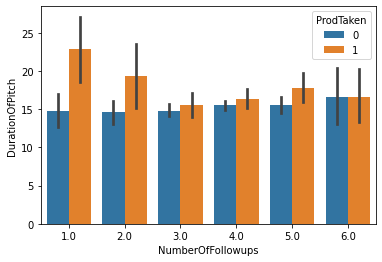

In [25]:
sns.barplot(x='NumberOfFollowups', y = 'DurationOfPitch', hue = 'ProdTaken', data=train)
plt.show()

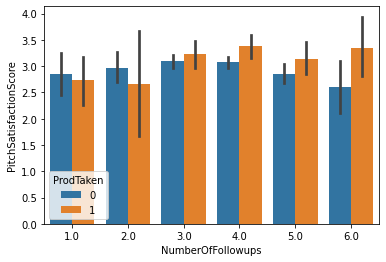

In [26]:
sns.barplot(x='NumberOfFollowups', y = 'PitchSatisfactionScore', hue = 'ProdTaken', data=train)
plt.show()

In [27]:
def pitch_fill(d_o_p):
    train['DurationOfPitch'] = train['DurationOfPitch'].fillna(d_o_p)

In [28]:
for d_o_p in round(train.groupby(['NumberOfFollowups']).mean()['DurationOfPitch'],1) :
    pitch_fill(d_o_p)

In [29]:
train.isna().sum()

id                            0
Age                           0
TypeofContact                10
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [30]:
def pitch_fill(d_o_p):
    test['DurationOfPitch'] = test['DurationOfPitch'].fillna(d_o_p)

In [31]:
for d_o_p in round(test.groupby(['NumberOfFollowups']).mean()['DurationOfPitch'],1) :
    pitch_fill(d_o_p)

In [32]:
test.isna().sum()

id                            0
Age                           0
TypeofContact                15
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               133
dtype: int64

#### MonthlyIncome

- 직업과 직급에 따라 월 급여 알아보기

In [33]:
train.groupby(['Occupation','Designation']).mean()['MonthlyIncome']

Occupation      Designation   
Free Lancer     Executive         17090.000000
Large Business  AVP               30991.714286
                Executive         19926.492537
                Manager           21835.770833
                Senior Manager    27773.093750
                VP                36643.600000
Salaried        AVP               32554.822581
                Executive         20366.131720
                Manager           22741.711340
                Senior Manager    26635.510638
                VP                35994.211538
Small Business  AVP               31868.131148
                Executive         19814.381481
                Manager           22615.487719
                Senior Manager    26539.542636
                VP                35341.968750
Name: MonthlyIncome, dtype: float64

- 직업과 직급에 따라 월급이 증가

In [34]:
def income_fillna(incomefill) :
    train['MonthlyIncome'] = train['MonthlyIncome'].fillna(incomefill)

In [35]:
round(train.groupby(['Occupation','Designation']).mean()['MonthlyIncome'],1)

Occupation      Designation   
Free Lancer     Executive         17090.0
Large Business  AVP               30991.7
                Executive         19926.5
                Manager           21835.8
                Senior Manager    27773.1
                VP                36643.6
Salaried        AVP               32554.8
                Executive         20366.1
                Manager           22741.7
                Senior Manager    26635.5
                VP                35994.2
Small Business  AVP               31868.1
                Executive         19814.4
                Manager           22615.5
                Senior Manager    26539.5
                VP                35342.0
Name: MonthlyIncome, dtype: float64

In [36]:
for incomefill in round(train.groupby(['Occupation','Designation']).mean()['MonthlyIncome'],1) :
    income_fillna(incomefill)

In [37]:
train.isna().sum()

id                           0
Age                          0
TypeofContact               10
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           13
ProductPitched               0
PreferredPropertyStar       10
MaritalStatus                0
NumberOfTrips               57
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    27
Designation                  0
MonthlyIncome                0
ProdTaken                    0
dtype: int64

In [38]:
def income_fillna(incomefill) :
    test['MonthlyIncome'] = test['MonthlyIncome'].fillna(incomefill)

In [39]:
for incomefill in round(test.groupby(['Occupation','Designation']).mean()['MonthlyIncome'],1) :
    income_fillna(incomefill)

In [40]:
test.isna().sum()

id                           0
Age                          0
TypeofContact               15
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           32
ProductPitched               0
PreferredPropertyStar       16
MaritalStatus                0
NumberOfTrips               83
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    39
Designation                  0
MonthlyIncome                0
dtype: int64

- 패키지 신청을 하지 않은 사람이 월 급여가 더 높다

#### NumberOfChildrenVisiting

- 결혼여부, 도시등급에 따른 함께 여행하는 어린이 수

In [41]:
train['NumberOfChildrenVisiting'].unique()

array([ 1.,  0.,  2.,  3., nan])

In [42]:
train['NumberOfChildrenVisiting'].describe()

count    1928.000000
mean        1.213174
std         0.859450
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: NumberOfChildrenVisiting, dtype: float64

In [43]:
train.groupby(['MaritalStatus']).mean()['NumberOfChildrenVisiting']

MaritalStatus
Divorced     1.182561
Married      1.233227
Single       0.991176
Unmarried    1.453901
Name: NumberOfChildrenVisiting, dtype: float64

In [44]:
train.groupby(['CityTier','MaritalStatus']).mean()['NumberOfChildrenVisiting']

CityTier  MaritalStatus
1         Divorced         1.271930
          Married          1.191523
          Single           0.969957
          Unmarried        1.400000
2         Divorced         0.928571
          Married          1.526316
          Single           0.888889
          Unmarried        1.428571
3         Divorced         1.048000
          Married          1.273469
          Single           1.051020
          Unmarried        1.542857
Name: NumberOfChildrenVisiting, dtype: float64

- 연봉이 높을수록 아이가 많을까?

In [45]:
train.groupby(['MaritalStatus','NumberOfChildrenVisiting']).mean()['MonthlyIncome']

MaritalStatus  NumberOfChildrenVisiting
Divorced       0.0                         22212.636364
               1.0                         24862.730263
               2.0                         24114.323232
               3.0                         25678.785714
Married        0.0                         20592.359375
               1.0                         23121.406948
               2.0                         24669.119134
               3.0                         25061.776119
Single         0.0                         19745.803738
               1.0                         21571.535211
               2.0                         22549.923077
               3.0                         25568.230769
Unmarried      0.0                         24299.965517
               1.0                         23727.303279
               2.0                         23675.266667
               3.0                         23447.038462
Name: MonthlyIncome, dtype: float64

- 결혼을 하지 않은 사람을 제외하고 연봉이 높을수록 아이가 많다

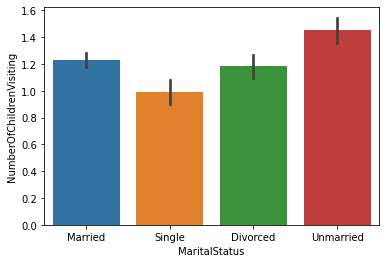

In [46]:
sns.barplot(x='MaritalStatus', y='NumberOfChildrenVisiting', data=train)
plt.show()

In [47]:
train[['MaritalStatus','MonthlyIncome']][train['NumberOfChildrenVisiting'].isnull()]

,MaritalStatus,MonthlyIncome
28,Single,35513.0
89,Single,35382.0
142,Divorced,34845.0
230,Single,34926.0
421,Single,35434.0
580,Single,35276.0
611,Divorced,35233.0
751,Single,34670.0
768,Married,34636.0
806,Divorced,34742.0


- 도시 등급에 따른 결혼여부

In [48]:
train.groupby(['MaritalStatus','CityTier']).count()

id  Age  TypeofContact  DurationOfPitch  Occupation  \
MaritalStatus CityTier                                                         
Divorced      1         232  232            231              232         232   
              2          14   14             14               14          14   
              3         129  129            128              129         129   
Married       1         642  642            638              642         642   
              2          59   59             59               59          59   
              3         248  248            247              248         248   
Single        1         239  239            236              239         239   
              2          10   10             10               10          10   
              3         100  100            100              100         100   
Unmarried     1         170  170            170              170         170   
              2           7    7              7                7           7   
              3         105  105            105              105         105   

                        Gender  NumberOfPersonVisiting  NumberOfFollowups  \
MaritalStatus CityTier                                                      
Divorced      1            232                     232                230   
              2             14                      14                 14   
              3            129                     129                129   
Married       1            642                     642                639   
              2             59                      59                 58   
              3            248                     248                247   
Single        1            239                     239                236   
              2             10                      10                 10   
              3            100                     100                 97   
Unmarried     1            170                     170                170   
              2              7                       7                  7   
              3            105                     105                105   

                        ProductPitched  PreferredPropertyStar  NumberOfTrips  \
MaritalStatus CityTier                                                         
Divorced      1                    232                    230            222   
              2                     14                     14             12   
              3                    129                    129            125   
Married       1                    642                    639            617   
              2                     59                     57             55   
              3                    248                    247            245   
Single        1                    239                    238            236   
              2                     10                     10              9   
              3                    100                     99             95   
Unmarried     1                    170                    170            170   
              2                      7                      7              7   
              3                    105                    105            105   

                        Passport  PitchSatisfactionScore  OwnCar  \
MaritalStatus CityTier                                             
Divorced      1              232                     232     232   
              2               14                      14      14   
              3              129                     129     129   
Married       1              642                     642     642   
              2               59                      59      59   
              3              248                     248     248   
Single        1              239                     239     239   
              2               10                      10      10   
              3         

In [49]:
train.isna().sum()

id                           0
Age                          0
TypeofContact               10
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           13
ProductPitched               0
PreferredPropertyStar       10
MaritalStatus                0
NumberOfTrips               57
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    27
Designation                  0
MonthlyIncome                0
ProdTaken                    0
dtype: int64

In [50]:
train.groupby('ProdTaken').count()['TypeofContact']

ProdTaken
0    1564
1     381
Name: TypeofContact, dtype: int64

In [51]:
train['ProdTaken'].value_counts()

0    1572
1     383
Name: ProdTaken, dtype: int64

### 시각화

- 패키지를 신청할수록 급여가 높을까?

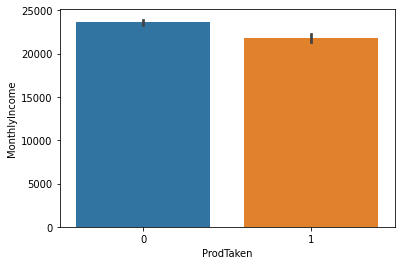

In [52]:
sns.barplot(x='ProdTaken', y='MonthlyIncome', data=train)
plt.show()

- 여권이 있을수록 여행 횟수가 높을까?

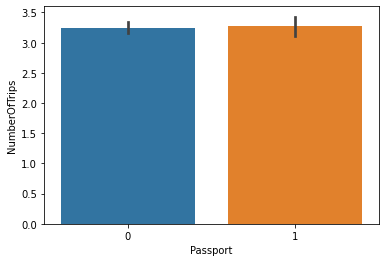

In [53]:
sns.barplot(x='Passport', y='NumberOfTrips', data=train)
plt.show()

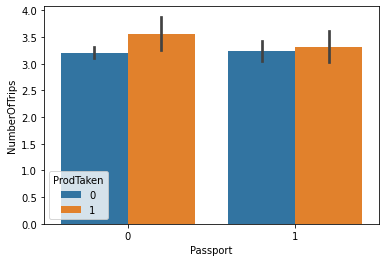

In [54]:
sns.barplot(x='Passport', y='NumberOfTrips', hue = 'ProdTaken',data=train)
plt.show()

- 같이가는 아이가 많을수록 패키지 신청을 많이 할까?

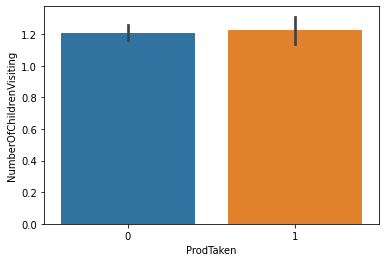

In [55]:
sns.barplot(x='ProdTaken', y = 'NumberOfChildrenVisiting', data=train)
plt.show()

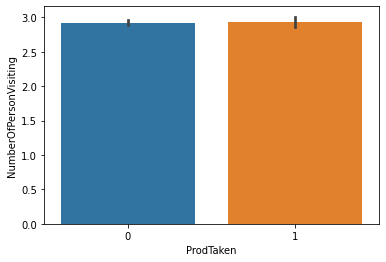

In [56]:
sns.barplot(x='ProdTaken', y = 'NumberOfPersonVisiting', data=train)
plt.show()

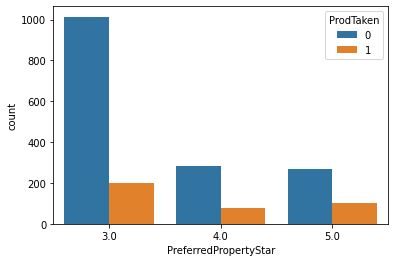

In [57]:
sns.countplot(x='PreferredPropertyStar', hue='ProdTaken', data=train)
plt.show()

#### PreferredPropertyStar

In [58]:
train.isna().sum()

id                           0
Age                          0
TypeofContact               10
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           13
ProductPitched               0
PreferredPropertyStar       10
MaritalStatus                0
NumberOfTrips               57
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    27
Designation                  0
MonthlyIncome                0
ProdTaken                    0
dtype: int64

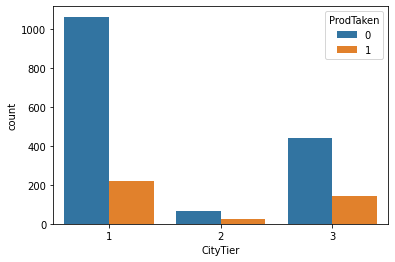

In [59]:
sns.countplot(x='CityTier', hue='ProdTaken', data=train)
plt.show()

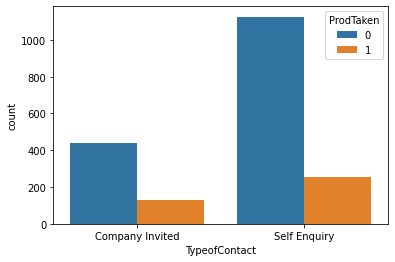

In [60]:
sns.countplot(x='TypeofContact', hue='ProdTaken', data=train)
plt.show()

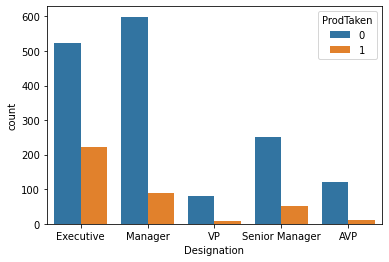

In [61]:
sns.countplot(x='Designation', hue='ProdTaken', data=train)
plt.show()

#### TypeofContact

In [62]:
train['TypeofContact'] = train['TypeofContact'].fillna('Self Enquiry')
train.isna().sum()

id                           0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups           13
ProductPitched               0
PreferredPropertyStar       10
MaritalStatus                0
NumberOfTrips               57
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    27
Designation                  0
MonthlyIncome                0
ProdTaken                    0
dtype: int64

In [63]:
test['TypeofContact'] = test['TypeofContact'].fillna('Self Enquiry')

#### NumberOfFollowups

In [64]:
train['NumberOfFollowups'] = train['NumberOfFollowups'].fillna(3)
train.isna().sum()

id                           0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar       10
MaritalStatus                0
NumberOfTrips               57
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    27
Designation                  0
MonthlyIncome                0
ProdTaken                    0
dtype: int64

In [65]:
test['NumberOfFollowups'] = test['NumberOfFollowups'].fillna(3)

#### PreferredPropertyStar

In [66]:
train['PreferredPropertyStar'] = train['PreferredPropertyStar'].fillna(3)
train.isna().sum()

id                           0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips               57
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    27
Designation                  0
MonthlyIncome                0
ProdTaken                    0
dtype: int64

In [67]:
test['PreferredPropertyStar'] = test['PreferredPropertyStar'].fillna(3)

#### NumberOfTrips

In [68]:
train['NumberOfTrips'] = train['NumberOfTrips'].fillna(3)
train.isna().sum()

id                           0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    27
Designation                  0
MonthlyIncome                0
ProdTaken                    0
dtype: int64

In [69]:
test['NumberOfTrips'] = test['NumberOfTrips'].fillna(3)

#### NumberOfChildrenVisiting

In [70]:
train['NumberOfChildrenVisiting'] = train['NumberOfChildrenVisiting'].fillna(1)
train.isna().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [71]:
test['NumberOfChildrenVisiting'] = test['NumberOfChildrenVisiting'].fillna(1)

In [72]:
test.isna().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### 변수만들기

In [73]:
train.insert(19,'AgeGp',np.where(train['Age']<20, 'children', np.where(train['Age']<30, 'adult', np.where(train['Age']<40, 'old', 'elder'))))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1955 non-null   float64
 2   TypeofContact             1955 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1955 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1955 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1955 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1955 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [74]:
test['AgeGp'] = np.where(test['Age']<20, 'children', np.where(test['Age']<30, 'adult', np.where(test['Age']<40, 'old', 'elder')))
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2933 non-null   int64  
 1   Age                       2933 non-null   float64
 2   TypeofContact             2933 non-null   object 
 3   CityTier                  2933 non-null   int64  
 4   DurationOfPitch           2933 non-null   float64
 5   Occupation                2933 non-null   object 
 6   Gender                    2933 non-null   object 
 7   NumberOfPersonVisiting    2933 non-null   int64  
 8   NumberOfFollowups         2933 non-null   float64
 9   ProductPitched            2933 non-null   object 
 10  PreferredPropertyStar     2933 non-null   float64
 11  MaritalStatus             2933 non-null   object 
 12  NumberOfTrips             2933 non-null   float64
 13  Passport                  2933 non-null   int64  
 14  PitchSat

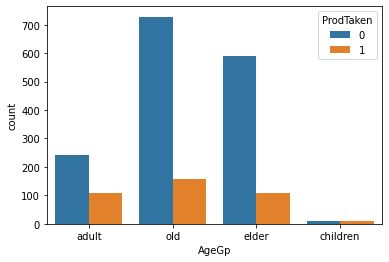

In [75]:
sns.countplot(x='AgeGp', hue='ProdTaken', data=train)
plt.show()

In [76]:
train.insert(20,'family',np.where(train['NumberOfChildrenVisiting']<=1, 'small', 'big'))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1955 non-null   float64
 2   TypeofContact             1955 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1955 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1955 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1955 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1955 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [77]:
test['family'] = np.where(test['NumberOfChildrenVisiting']<=1, 'small', 'big')
test['family'].value_counts()

small    1966
big       967
Name: family, dtype: int64

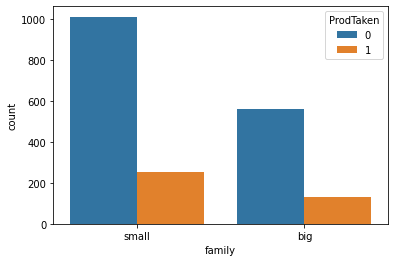

In [78]:
sns.countplot(x='family', hue='ProdTaken', data=train)
plt.show()

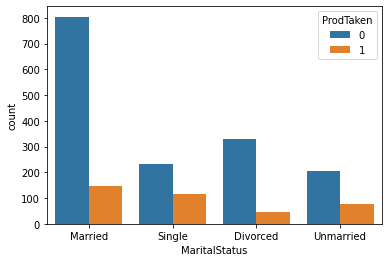

In [79]:
sns.countplot(x='MaritalStatus', hue='ProdTaken', data=train)
plt.show()

#### 변수 타입 변경

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1955 non-null   float64
 2   TypeofContact             1955 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1955 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1955 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1955 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1955 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [81]:
object_columns = train.columns[train.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 보아서 봅시다
train[object_columns]

object 칼럼은 다음과 같습니다 :  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation', 'AgeGp', 'family']


,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation,AgeGp,family
0,Company Invited,Small Business,Male,Basic,Married,Executive,adult,small
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager,old,small
2,Company Invited,Salaried,Male,Deluxe,Married,Manager,elder,small
3,Company Invited,Small Business,Male,Basic,Married,Executive,adult,small
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager,elder,small
...,...,...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive,adult,big
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP,elder,small
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive,old,big
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager,adult,big


In [82]:
train_enc = train.copy()

In [83]:
from sklearn.preprocessing import LabelEncoder

# 모든 문자형 변수에 대해 encoder를 적용합니다.
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train[o_col])
    train[o_col] = encoder.transform(train[o_col])

# 결과를 확인합니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1955 non-null   float64
 2   TypeofContact             1955 non-null   int32  
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1955 non-null   float64
 5   Occupation                1955 non-null   int32  
 6   Gender                    1955 non-null   int32  
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1955 non-null   float64
 9   ProductPitched            1955 non-null   int32  
 10  PreferredPropertyStar     1955 non-null   float64
 11  MaritalStatus             1955 non-null   int32  
 12  NumberOfTrips             1955 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [84]:
# 모든 문자형 변수에 대해 encoder를 적용합니다.
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train_enc[o_col])
    test[o_col] = encoder.transform(test[o_col])
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGp,family
0,1,32.0,0,3,14.7,3,1,2,5.0,1,...,1,1.0,0,2,0,1.0,2,19668.0,3,1
1,2,46.0,1,2,11.0,3,1,3,3.0,1,...,1,1.0,1,5,0,1.0,2,20021.0,2,1
2,3,37.0,1,3,22.0,3,1,3,4.0,1,...,1,5.0,0,5,1,0.0,2,21334.0,3,1
3,4,43.0,1,1,36.0,3,1,3,6.0,1,...,3,6.0,0,3,1,2.0,2,22950.0,2,0
4,5,25.0,1,3,7.0,1,0,4,4.0,0,...,3,3.0,1,4,1,3.0,1,21880.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,0,2,3.0,4,...,2,7.0,0,4,1,1.0,0,32328.0,2,1
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,...,3,2.0,0,3,0,1.0,2,23733.0,3,1
2930,2931,33.0,0,1,31.0,2,1,4,4.0,1,...,0,3.0,0,4,1,1.0,2,23987.0,3,1
2931,2932,26.0,1,1,9.0,3,1,4,2.0,0,...,3,2.0,0,2,1,3.0,1,22102.0,0,0


In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2933 non-null   int64  
 1   Age                       2933 non-null   float64
 2   TypeofContact             2933 non-null   int32  
 3   CityTier                  2933 non-null   int64  
 4   DurationOfPitch           2933 non-null   float64
 5   Occupation                2933 non-null   int32  
 6   Gender                    2933 non-null   int32  
 7   NumberOfPersonVisiting    2933 non-null   int64  
 8   NumberOfFollowups         2933 non-null   float64
 9   ProductPitched            2933 non-null   int32  
 10  PreferredPropertyStar     2933 non-null   float64
 11  MaritalStatus             2933 non-null   int32  
 12  NumberOfTrips             2933 non-null   float64
 13  Passport                  2933 non-null   int64  
 14  PitchSat

In [86]:
# MinMaxScaler를 준비해줍니다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# MinMaxScaler는 학습하는 과정을 필요로 합니다.
scaler.fit(train[['Age', 'DurationOfPitch', 'MonthlyIncome']])

# 학습된 scaler를 사용하여 변환해줍니다.
train[['Age', 'DurationOfPitch', 'MonthlyIncome']] = scaler.transform(train[['Age', 'DurationOfPitch', 'MonthlyIncome']])

# 결과를 확인합니다.
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGp,family,ProdTaken
0,1,0.232558,0,1,0.161290,3,1,3,4.0,0,...,3.0,0,1,0,1.0,1,0.198448,0,1,0
1,2,0.372093,1,3,0.354839,3,0,2,4.0,1,...,1.0,1,5,1,0.0,2,0.190411,3,1,1
2,3,0.627907,0,1,0.354839,2,1,2,3.0,1,...,2.0,0,4,1,0.0,2,0.164725,2,1,0
3,4,0.255814,0,1,0.064516,3,1,3,5.0,0,...,3.0,0,4,0,1.0,1,0.207560,0,1,1
4,5,0.558140,1,3,0.032258,2,1,2,3.0,1,...,2.0,0,3,1,0.0,2,0.193565,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,0.232558,1,1,0.161290,3,1,3,5.0,0,...,2.0,0,1,1,2.0,1,0.201919,0,0,0
1951,1952,0.534884,1,3,0.096774,2,0,3,3.0,4,...,1.0,0,5,1,1.0,0,0.313223,2,1,0
1952,1953,0.465116,0,3,0.741935,3,0,3,4.0,0,...,7.0,0,2,1,2.0,1,0.211419,3,0,0
1953,1954,0.232558,1,3,0.806452,3,0,3,5.0,1,...,3.0,0,1,1,2.0,2,0.217224,0,0,0


In [87]:
# 학습된 scaler를 사용하여 변환해줍니다.
test[['Age', 'DurationOfPitch', 'MonthlyIncome']] = scaler.transform(test[['Age', 'DurationOfPitch', 'MonthlyIncome']])

test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGp,family
0,1,0.325581,0,3,0.312903,3,1,2,5.0,1,...,1,1.0,0,2,0,1.0,2,0.191118,3,1
1,2,0.651163,1,2,0.193548,3,1,3,3.0,1,...,1,1.0,1,5,0,1.0,2,0.194732,2,1
2,3,0.441860,1,3,0.548387,3,1,3,4.0,1,...,1,5.0,0,5,1,0.0,2,0.208174,3,1
3,4,0.581395,1,1,1.000000,3,1,3,6.0,1,...,3,6.0,0,3,1,2.0,2,0.224718,2,0
4,5,0.162791,1,3,0.064516,1,0,4,4.0,0,...,3,3.0,1,4,1,3.0,1,0.213764,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,0.837209,1,1,0.032258,3,0,2,3.0,4,...,2,7.0,0,4,1,1.0,0,0.320727,2,1
2929,2930,0.348837,1,1,0.129032,3,0,4,2.0,1,...,3,2.0,0,3,0,1.0,2,0.232734,3,1
2930,2931,0.348837,0,1,0.838710,2,1,4,4.0,1,...,0,3.0,0,4,1,1.0,2,0.235334,3,1
2931,2932,0.186047,1,1,0.129032,3,1,4,2.0,0,...,3,2.0,0,2,1,3.0,1,0.216036,0,0


### 분석

In [88]:
# 분석할 의미가 없는 칼럼을 제거합니다.
train.drop('id', axis=1, inplace = True)
test.drop('id', axis=1, inplace = True)

In [89]:
train.shape

(1955, 21)

In [90]:
train.shape

(1955, 21)

In [91]:
test.shape

(2933, 20)

In [92]:
feature = train.iloc[:, :-1]
target = train['ProdTaken']

In [93]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1955 non-null   float64
 1   TypeofContact             1955 non-null   int32  
 2   CityTier                  1955 non-null   int64  
 3   DurationOfPitch           1955 non-null   float64
 4   Occupation                1955 non-null   int32  
 5   Gender                    1955 non-null   int32  
 6   NumberOfPersonVisiting    1955 non-null   int64  
 7   NumberOfFollowups         1955 non-null   float64
 8   ProductPitched            1955 non-null   int32  
 9   PreferredPropertyStar     1955 non-null   float64
 10  MaritalStatus             1955 non-null   int32  
 11  NumberOfTrips             1955 non-null   float64
 12  Passport                  1955 non-null   int64  
 13  PitchSatisfactionScore    1955 non-null   int64  
 14  OwnCar  

In [94]:
feature.shape

(1955, 20)

In [95]:
target.shape

(1955,)

In [96]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [97]:
model = RandomForestClassifier()

x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state = 7)


#학습 및 예측
model.fit(x_train, y_train)
pred = model.predict(x_test)

#평가
accuracy_score(y_test, pred)

0.8711656441717791

In [98]:
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[0 0 0 0 1 0 0 1 0 0]


In [99]:
# 예측된 값을 정답파일과 병합
submission = pd.read_csv(r"C:\Users\82109\OneDrive\바탕 화면\sample_submission.csv")
submission['ProdTaken'] = prediction

# 정답파일 데이터프레임 확인
submission.head()

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


In [100]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
#submission.to_csv(r"C:\Users\82109\OneDrive\바탕 화면\제출\submission2.csv",index = False)